<a href="https://colab.research.google.com/github/Derrick-Majani/Football_CLassification/blob/main/FootballUnsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective
OnSports is a fantasy sports platform which has fantasy leagues for many different sports and has witnessed an increasing number of participants globally over the past 5 years. For each player, a price is set at the start, and the price keeps changing over time based on the performance of the players in the real world. With the new English Premier League season about to start, they have collected data of the past season and want to analyze it to determine the price of each player for the start of the new season. OnSports have hired you as a data scientist and asked you to conduct a cluster analysis to identify players of different potentials of each player based on previous season performance. This will help them understand the patterns in player performances and fantasy returns and decide the exact price to be set for each player for the upcoming football season.

## Data Dictionary
- Player_Name: Name of the player
- Club: Club in which the player plays
- Position: Position in which the player plays
- Goals_Scored: Number of goals scored by the player in the previous season
- Assists: Number of passes made by the player leading to goals in the previous season
- Total_Points: Total number of fantasy points scored by the player in the previous season
- Minutes: Number of minutes played by the player in the previous season
- Goals_Conceded: Number of goals conceded by the player in the previous season
- Creativity: A score, computed using a range of stats, that assesses player performance in terms of producing goalscoring opportunities for other players
- Influence: A score, computed using a range of stats, that evaluates a player's impact on a match, taking into account actions that could directly or indirectly affect the match outcome
- Threat: A score, computed using a range of stats, that gauges players who are most likely to score goals
- Bonus: Total bonus points received (The three best performing players in each match receive additional bonus points based on a score computed using a range of stats. 3 points are awarded to the highest scoring player, 2 to the second best, and 1 to the third.)
- Clean_Sheets: Number of matches without conceding a goal in the previous season

In [48]:
# this will help in making the Python code more structured automatically (good coding practice)


# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler
import io
# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [2]:
# Use Local drives to upload the excel on google colab
from google.colab import files
uploaded = files.upload()

Saving fpl_data.csv to fpl_data.csv


In [50]:
data=pd.read_csv(io.BytesIO(uploaded['fpl_data.csv']))
data.head(10)


,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0
1,Alexandre Lacazette,Arsenal,Forward,13,3,129,1916,21,307.4,602.4,797,21,7
2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11
3,Bukayo Saka,Arsenal,Midfielder,5,5,114,2554,31,650.6,493.0,984,8,8
4,Calum Chambers,Arsenal,Defender,0,3,36,751,10,169.4,171.8,77,3,2
5,Cedric Soares,Arsenal,Defender,0,1,28,744,11,114.8,110.8,66,3,2
6,Daniel Ceballos,Arsenal,Midfielder,0,4,62,1609,17,422.3,359.8,141,7,6
7,David Luiz,Arsenal,Defender,1,0,41,1396,20,46.7,250.6,144,0,3
8,Edward Nketiah,Arsenal,Forward,2,1,36,411,6,97.3,116.6,211,5,1
9,Emile Smith Rowe,Arsenal,Midfielder,2,5,74,1438,10,385.1,273.2,222,3,9


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player_Name     476 non-null    object 
 1   Club            476 non-null    object 
 2   Position        476 non-null    object 
 3   Goals_Scored    476 non-null    int64  
 4   Assists         476 non-null    int64  
 5   Total_Points    476 non-null    int64  
 6   Minutes         476 non-null    int64  
 7   Goals_Conceded  476 non-null    int64  
 8   Creativity      476 non-null    float64
 9   Influence       476 non-null    float64
 10  Threat          476 non-null    int64  
 11  Bonus           476 non-null    int64  
 12  Clean_Sheets    476 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 48.5+ KB


In [52]:
data.duplicated().sum()

0

In [53]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

In [54]:
df.isnull().sum()

Player_Name       0
Club              0
Position          0
Goals_Scored      0
Assists           0
Total_Points      0
Minutes           0
Goals_Conceded    0
Creativity        0
Influence         0
Threat            0
Bonus             0
Clean_Sheets      0
dtype: int64

## Statistical Analysis

In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Goals_Scored,476.0,1.907563,3.455562,0.0,0.00,0.50,2.00,23.0
Assists,476.0,1.752101,2.708563,0.0,0.00,0.00,2.00,14.0
Total_Points,476.0,58.516807,51.293559,0.0,10.00,48.00,94.25,244.0
Minutes,476.0,1336.909664,1073.773995,0.0,268.75,1269.50,2256.25,3420.0
Goals_Conceded,476.0,19.157563,15.946171,0.0,4.00,18.00,31.00,68.0
Creativity,476.0,195.976050,251.478541,0.0,8.30,96.95,296.95,1414.9
Influence,476.0,294.617647,267.779681,0.0,46.50,233.10,499.50,1318.2
Threat,476.0,224.962185,318.240377,0.0,5.75,104.50,298.25,1980.0
Bonus,476.0,4.718487,6.252625,0.0,0.00,2.00,7.00,40.0
Clean_Sheets,476.0,4.745798,4.394312,0.0,0.00,4.00,8.00,19.0


In [56]:
# Print categorical summary
print('Categorical Summary:')
df.describe(include=['object']).T

Categorical Summary:


,count,unique,top,freq
Player_Name,476,476,Alex Runnarsson,1
Club,476,17,Arsenal,30
Position,476,4,Midfielder,195


## Univariate Analysis

In [57]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

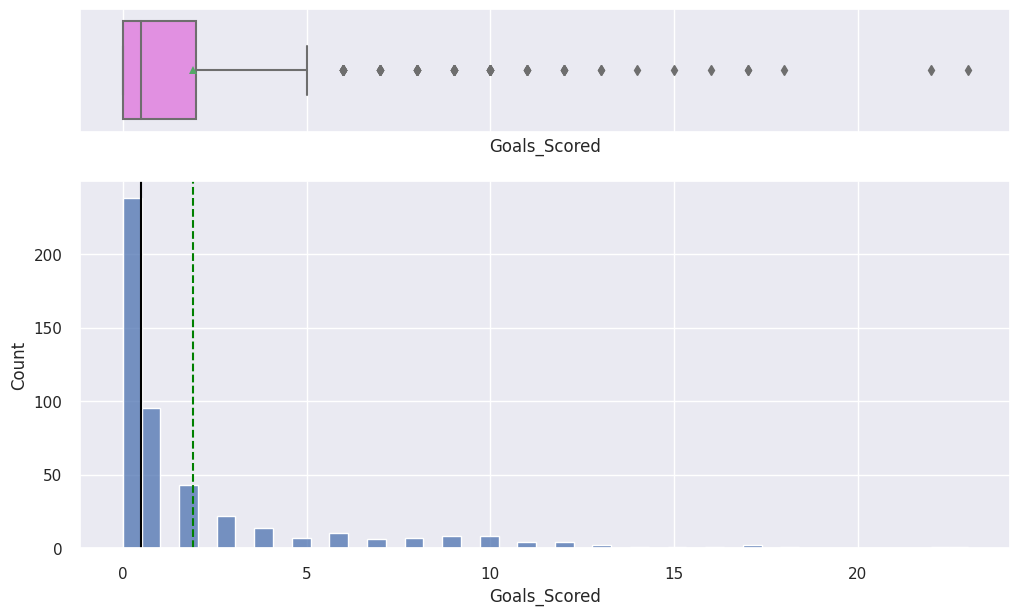

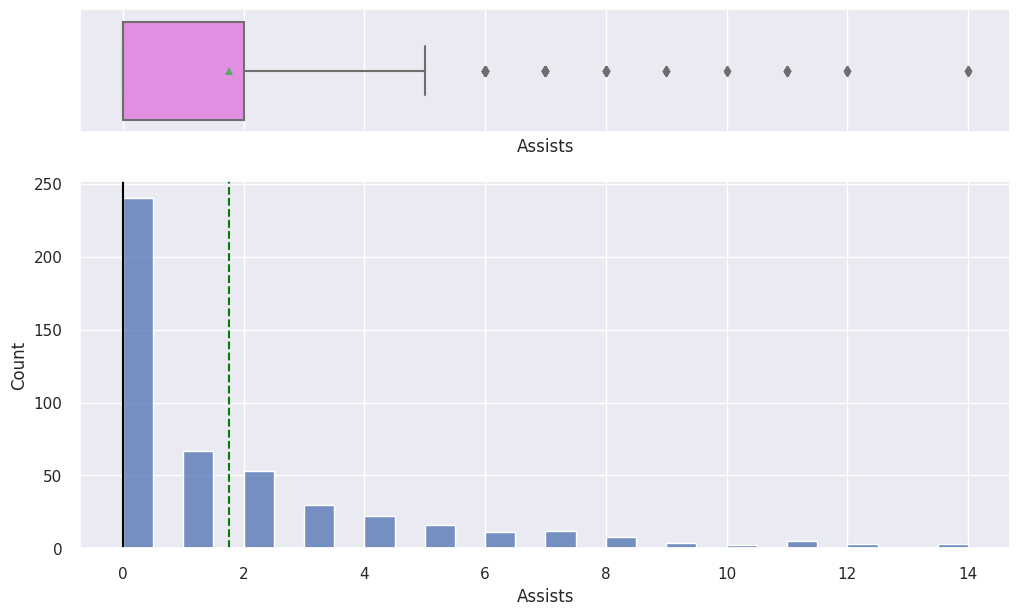

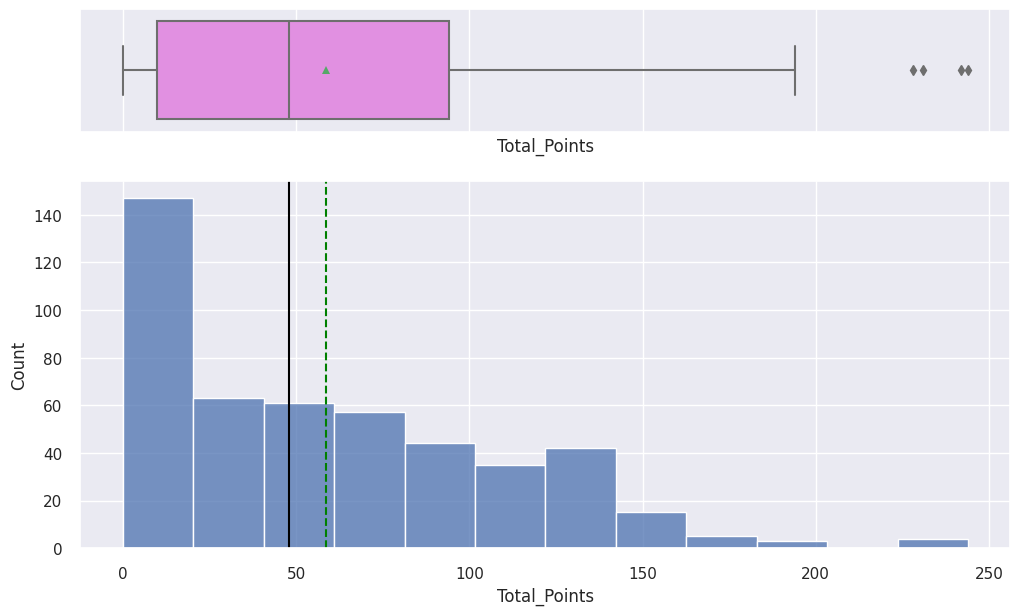

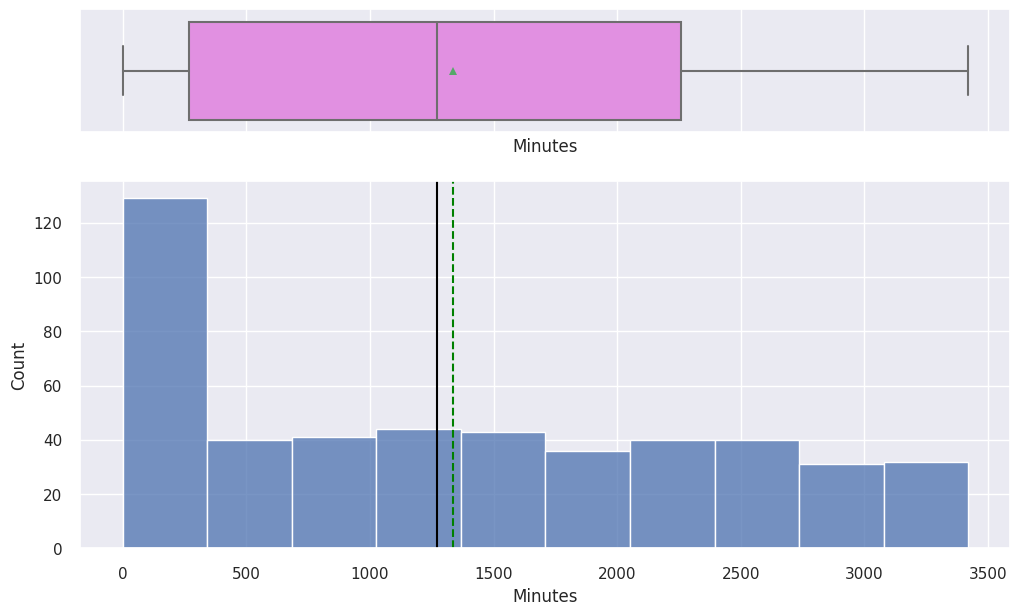

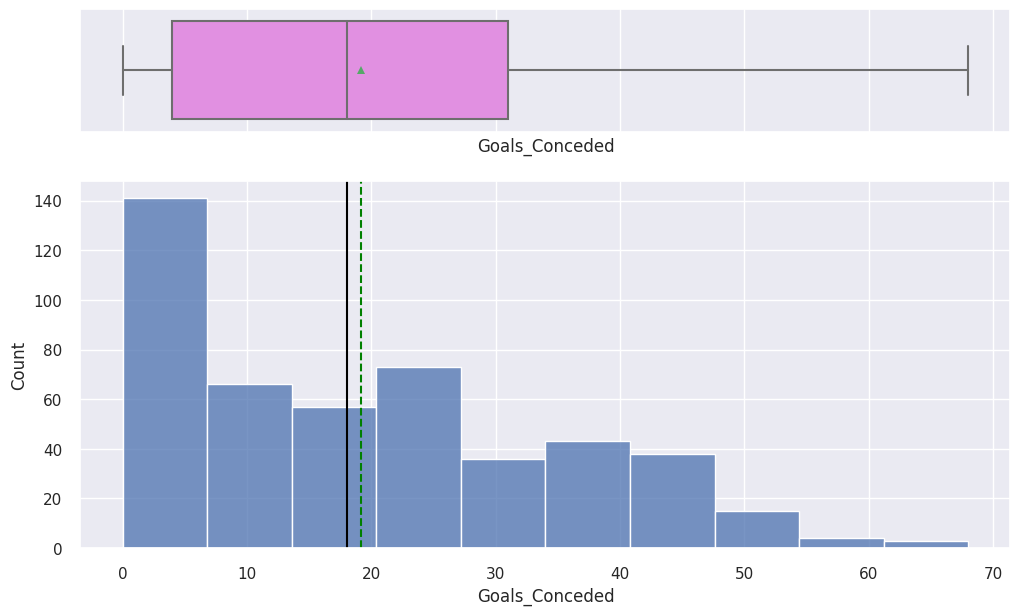

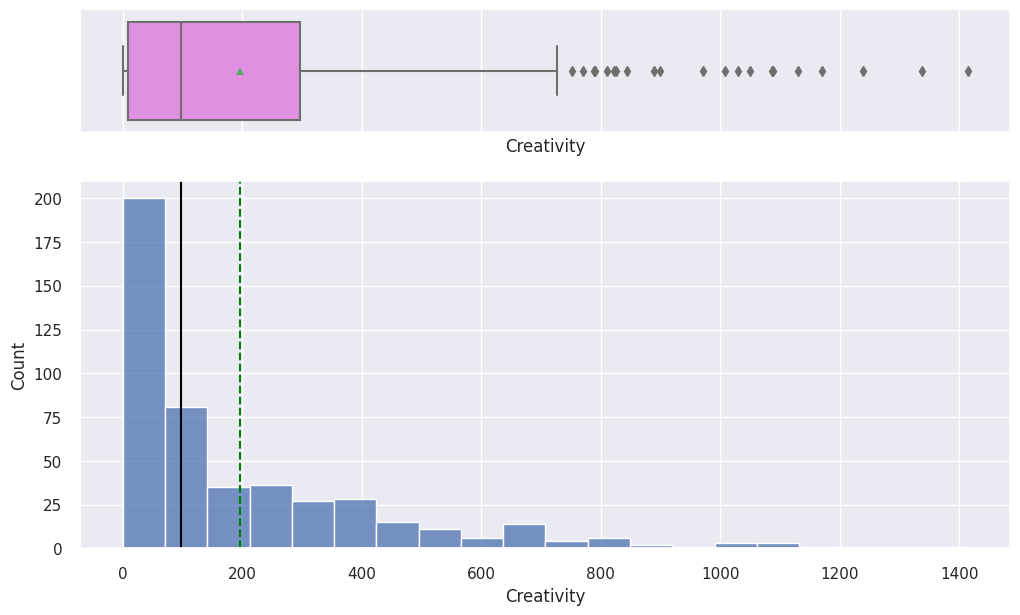

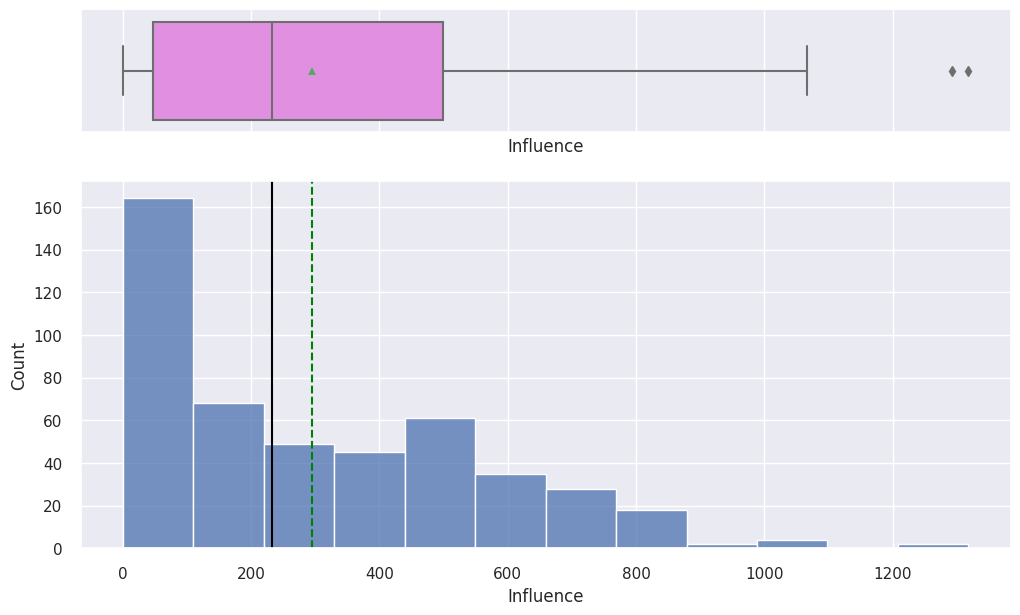

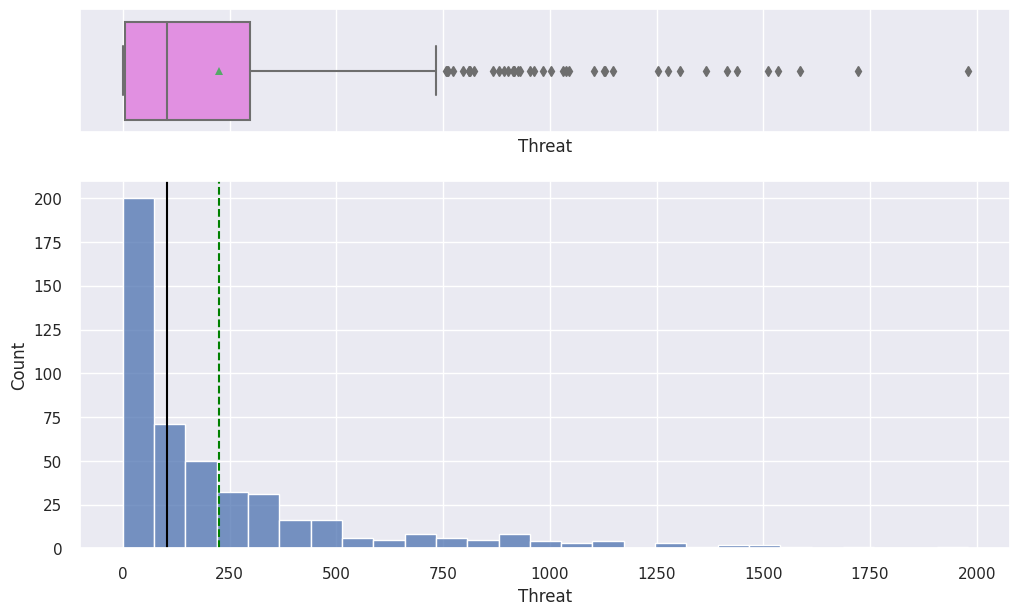

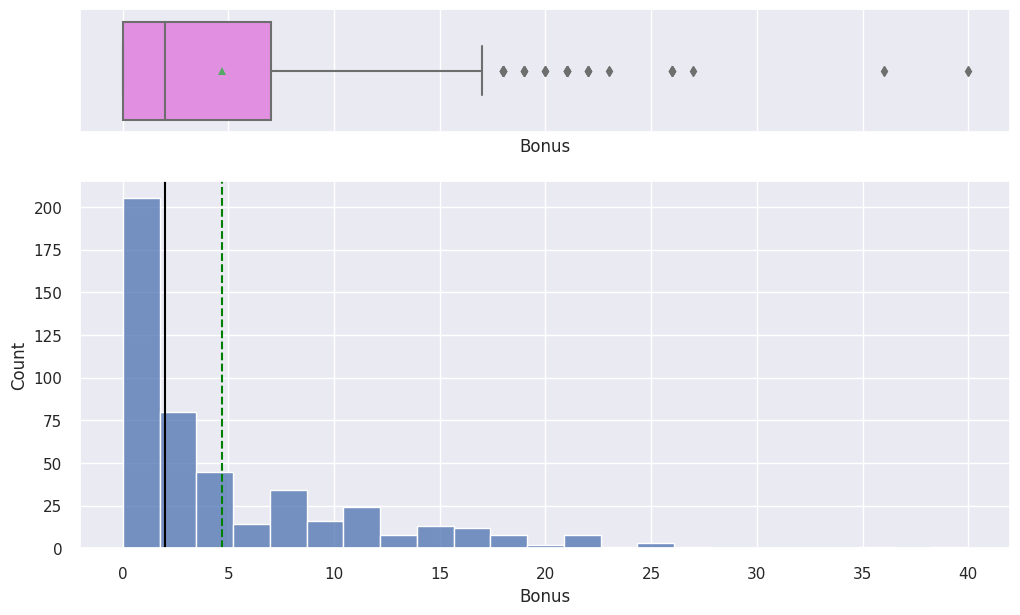

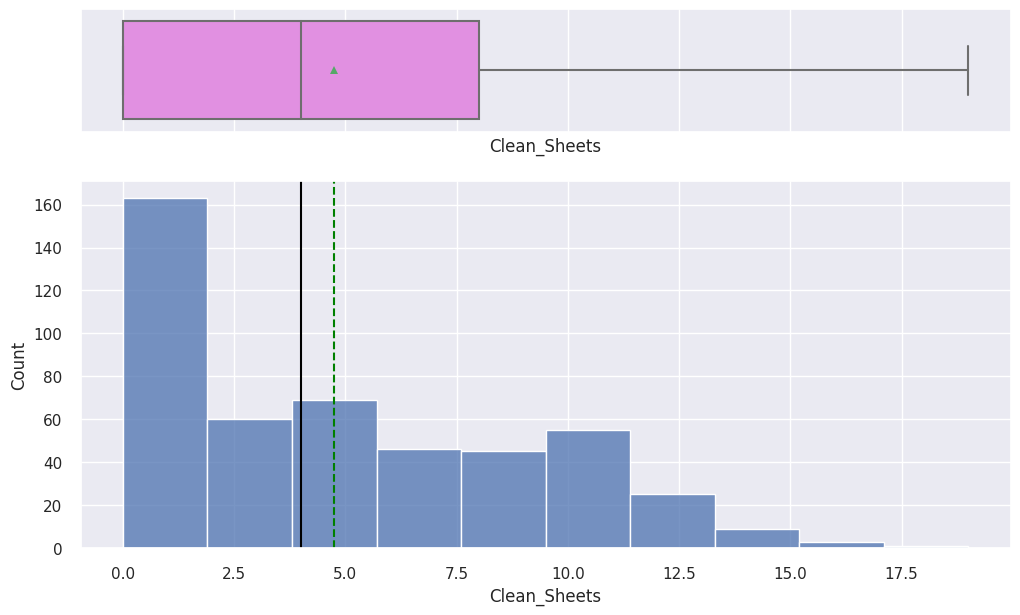

In [58]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item)

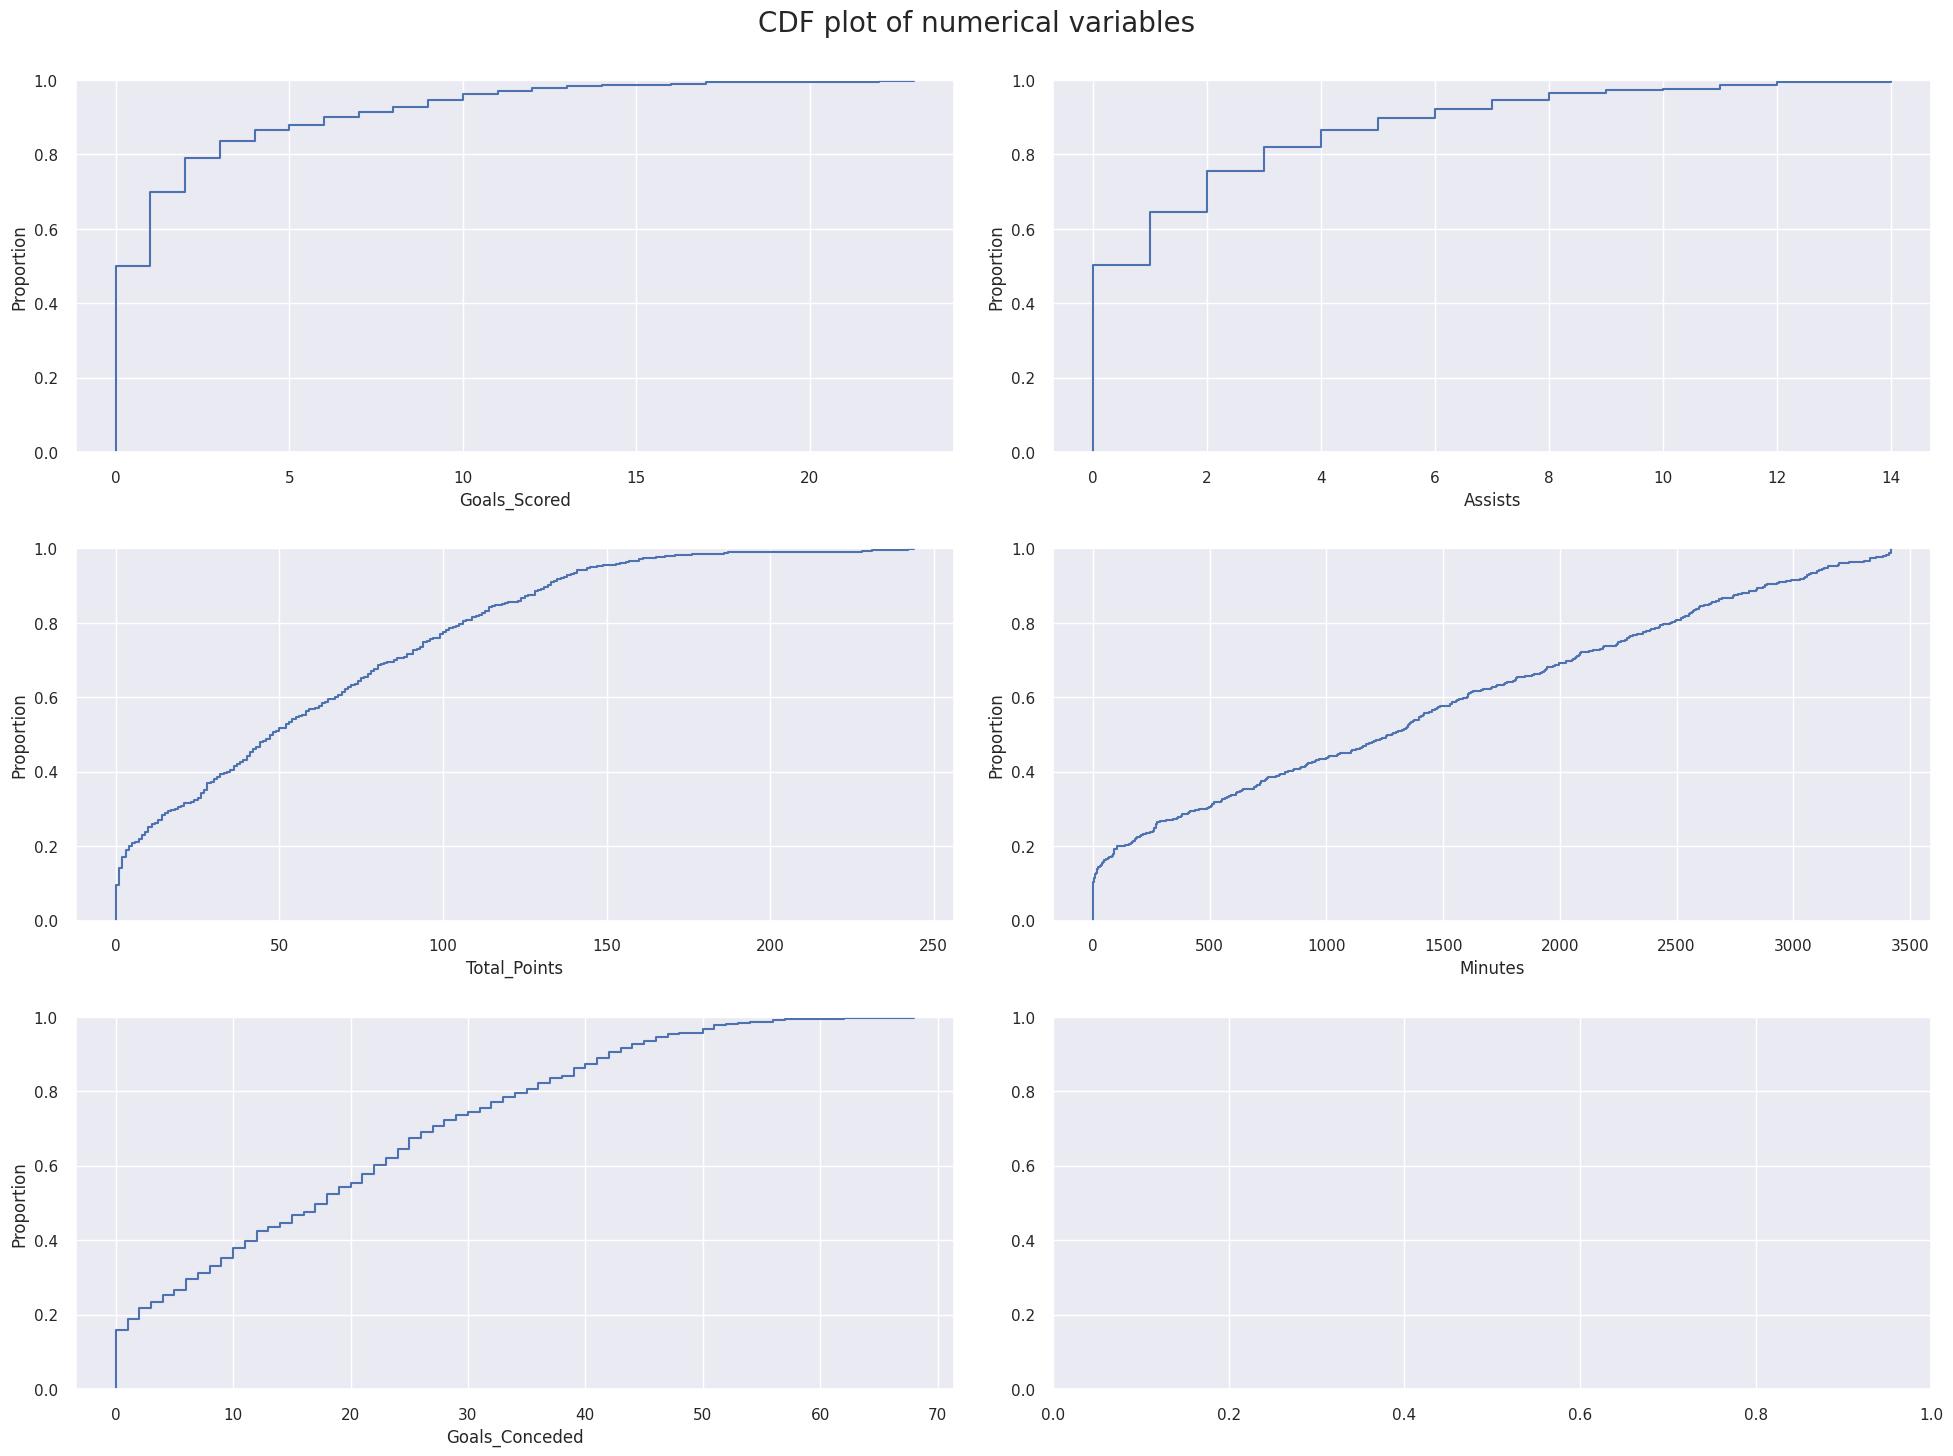

In [59]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_col[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=df[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

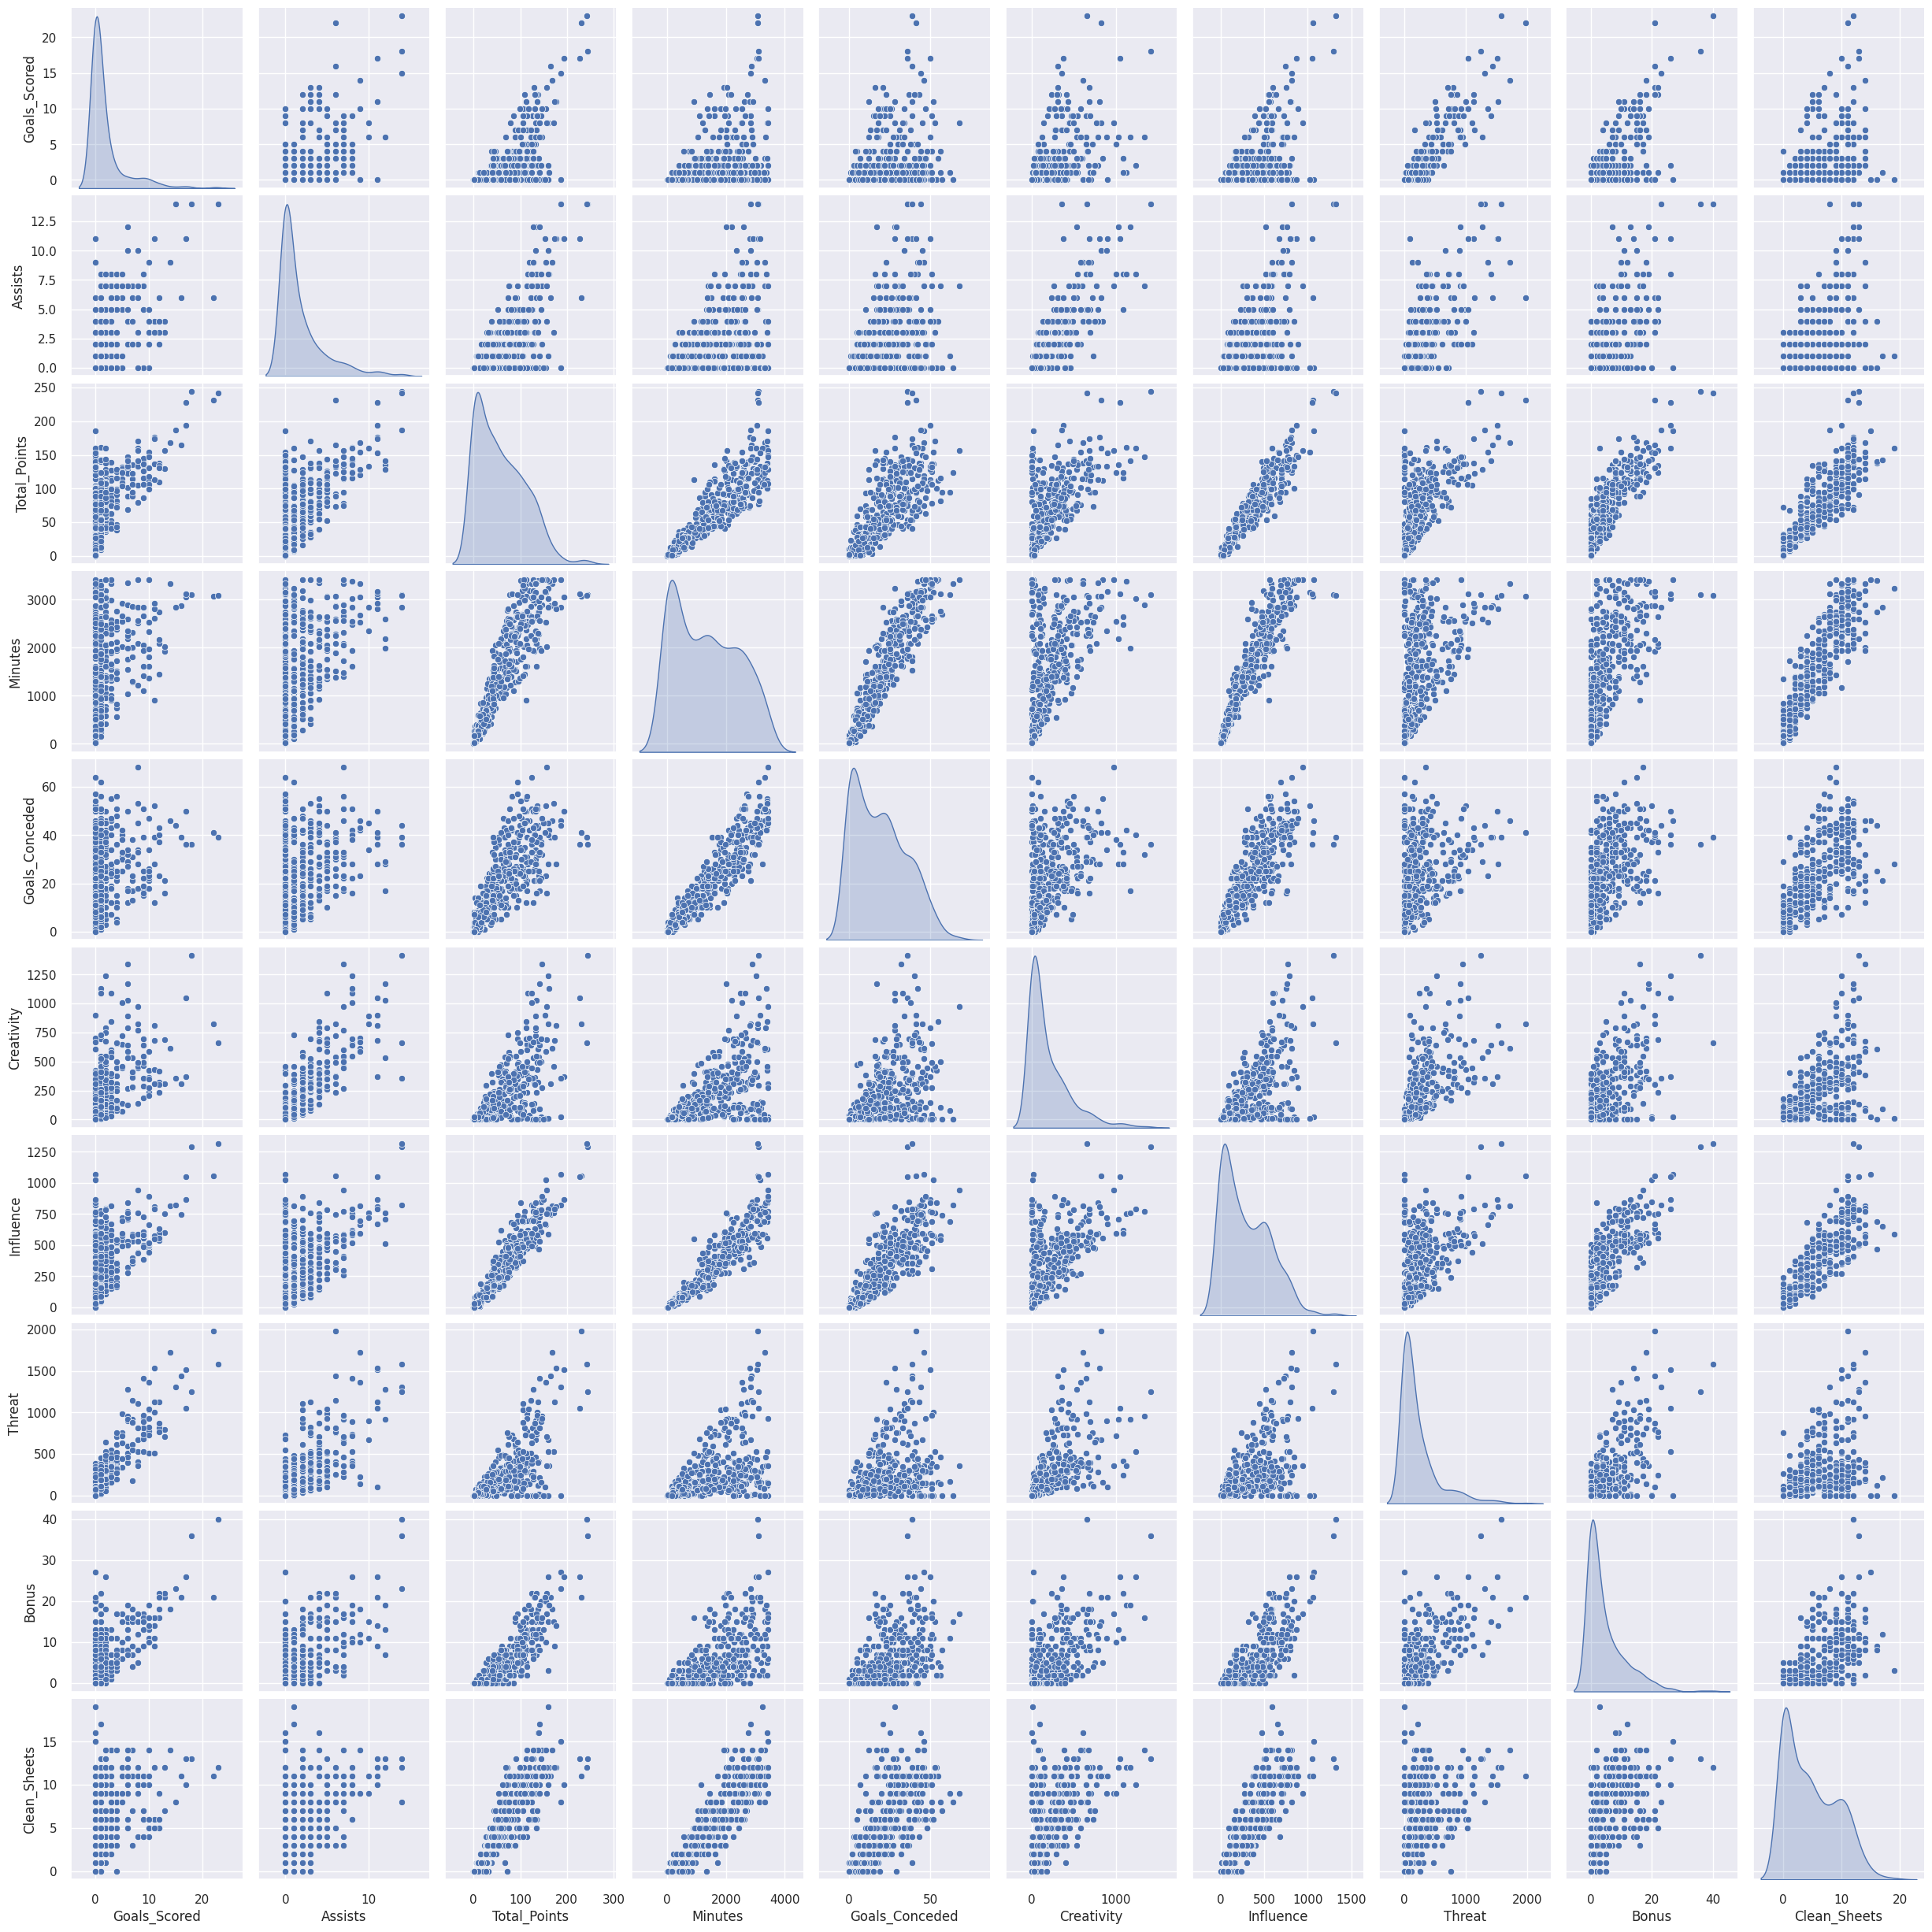

In [60]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

In [61]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

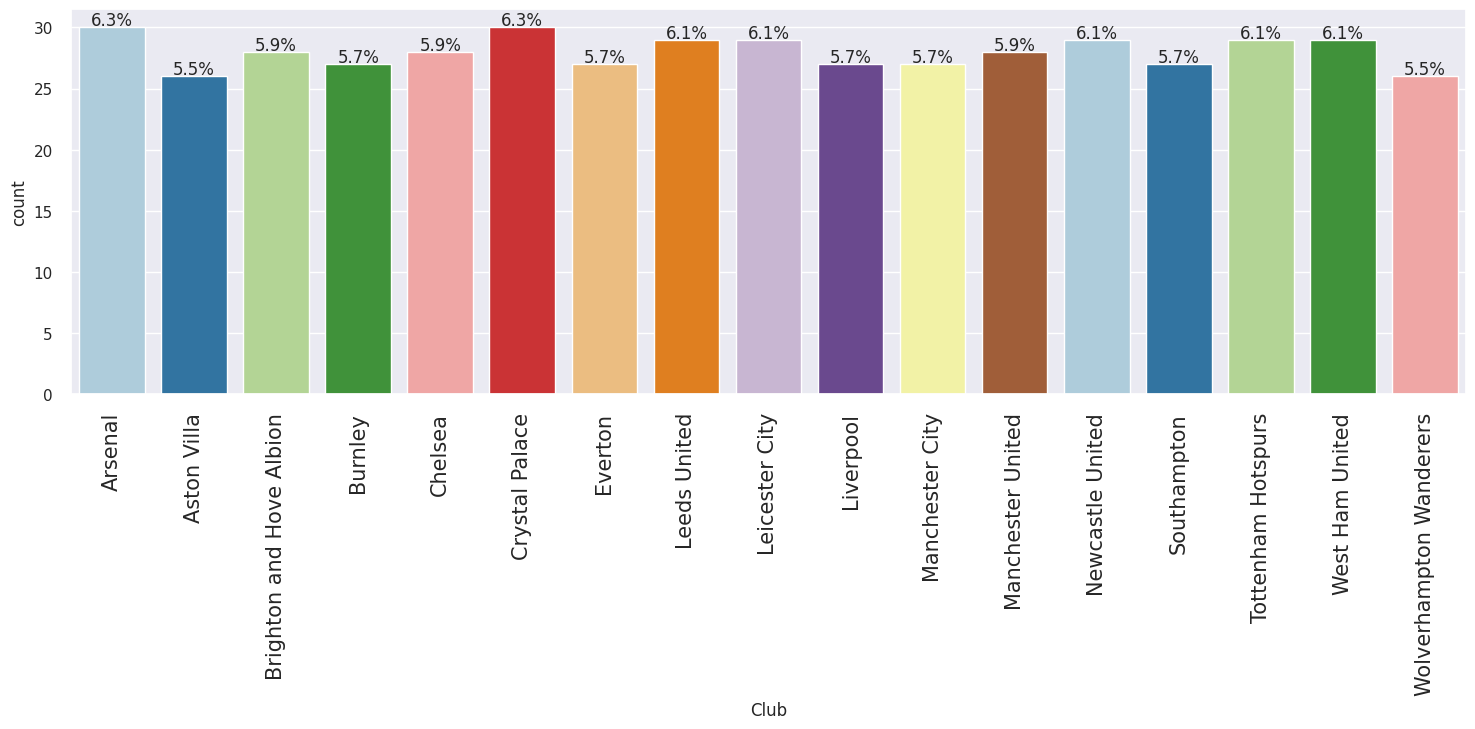

In [62]:
# let's explore discounts further
labeled_barplot(df, "Club", perc=True)

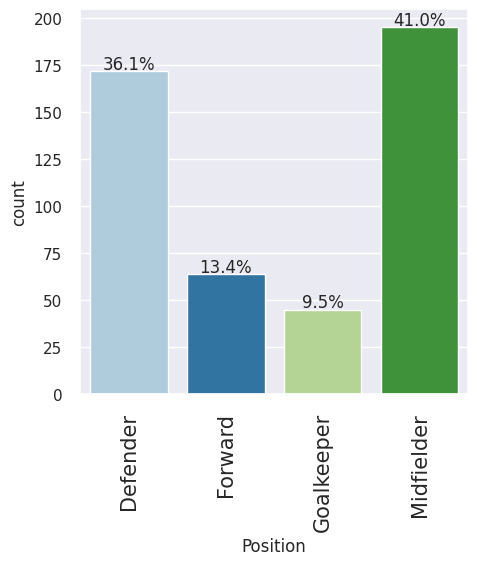

In [63]:
# let's explore discounts further
labeled_barplot(df, "Position", perc=True)

## Bivariate Analysis

<ipython-input-64-927d094bbfcc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset_corr = df.corr().round(4)


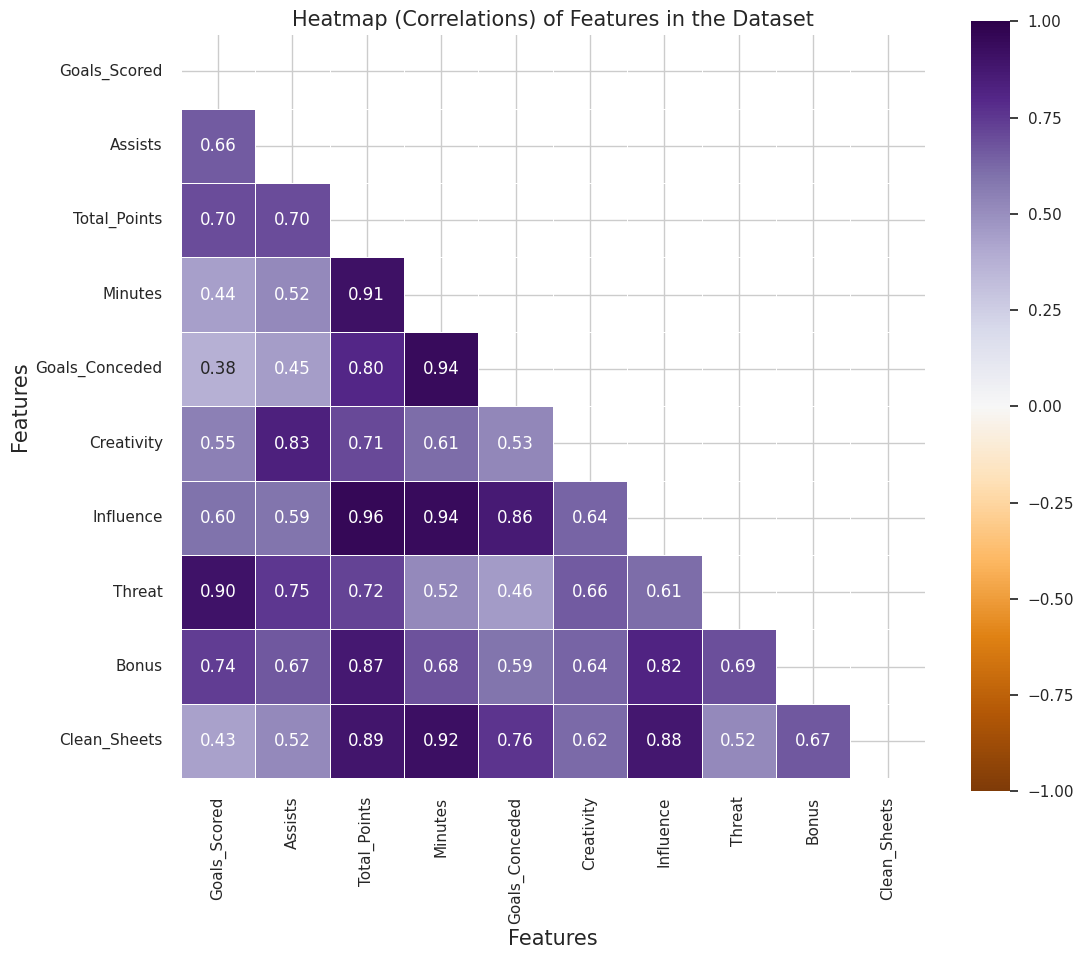

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player_Name     476 non-null    object 
 1   Club            476 non-null    object 
 2   Position        476 non-null    object 
 3   Goals_Scored    476 non-null    int64  
 4   Assists         476 non-null    int64  
 5   Total_Points    476 non-null    int64  
 6   Minutes         476 non-null    int64  
 7   Goals_Conceded  476 non-null    int64  
 8   Creativity      476 non-null    float64
 9   Influence       476 non-null    float64
 10  Threat          476 non-null    int64  
 11  Bonus           476 non-null    int64  
 12  Clean_Sheets    476 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 48.5+ KB


In [64]:
# Create a correlation for the dataset.
dataset_corr = df.corr().round(4)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Create a correlation matrix. Only bottom left corner valued.
mask = np.zeros_like(dataset_corr.round(4))
mask[np.triu_indices_from(mask)] = True

# Generate the corrleation matrix (heatmap) using Seaborn.
with sns.axes_style("whitegrid"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(dataset_corr.round(2), mask=mask, vmax=1, center = 0, vmin=-1, square=True, cmap='PuOr', linewidths=.5, annot=True, annot_kws={"size": 12}, fmt='.2f')
    plt.title('Heatmap (Correlations) of Features in the Dataset', fontsize=15)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Features', fontsize=15)
plt.show()
df.info()

## CHi- Square

In [65]:
from scipy.stats import chi2_contingency
# Select the categorical columns to test
cat_cols = ['Club', 'Position']

# Create an empty dataframe for results
results_df = pd.DataFrame(columns=['Column 1', 'Column 2', 'Chi-Square', 'P-Value'])

# Loop through each column pair and perform chi-square test
for i, col1 in enumerate(cat_cols):
    for j, col2 in enumerate(cat_cols[i+1:]):
        contingency_table = pd.crosstab(df[col1], df[col2])
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        results_df = results_df.append({'Column 1': col1, 'Column 2': col2, 'Chi-Square': chi2, 'P-Value': p}, ignore_index=True)

# Print the results
results_df

<ipython-input-65-3fe910c96812>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Column 1': col1, 'Column 2': col2, 'Chi-Square': chi2, 'P-Value': p}, ignore_index=True)


,Column 1,Column 2,Chi-Square,P-Value
0,Club,Position,22.901504,0.999202


## Outliers Check

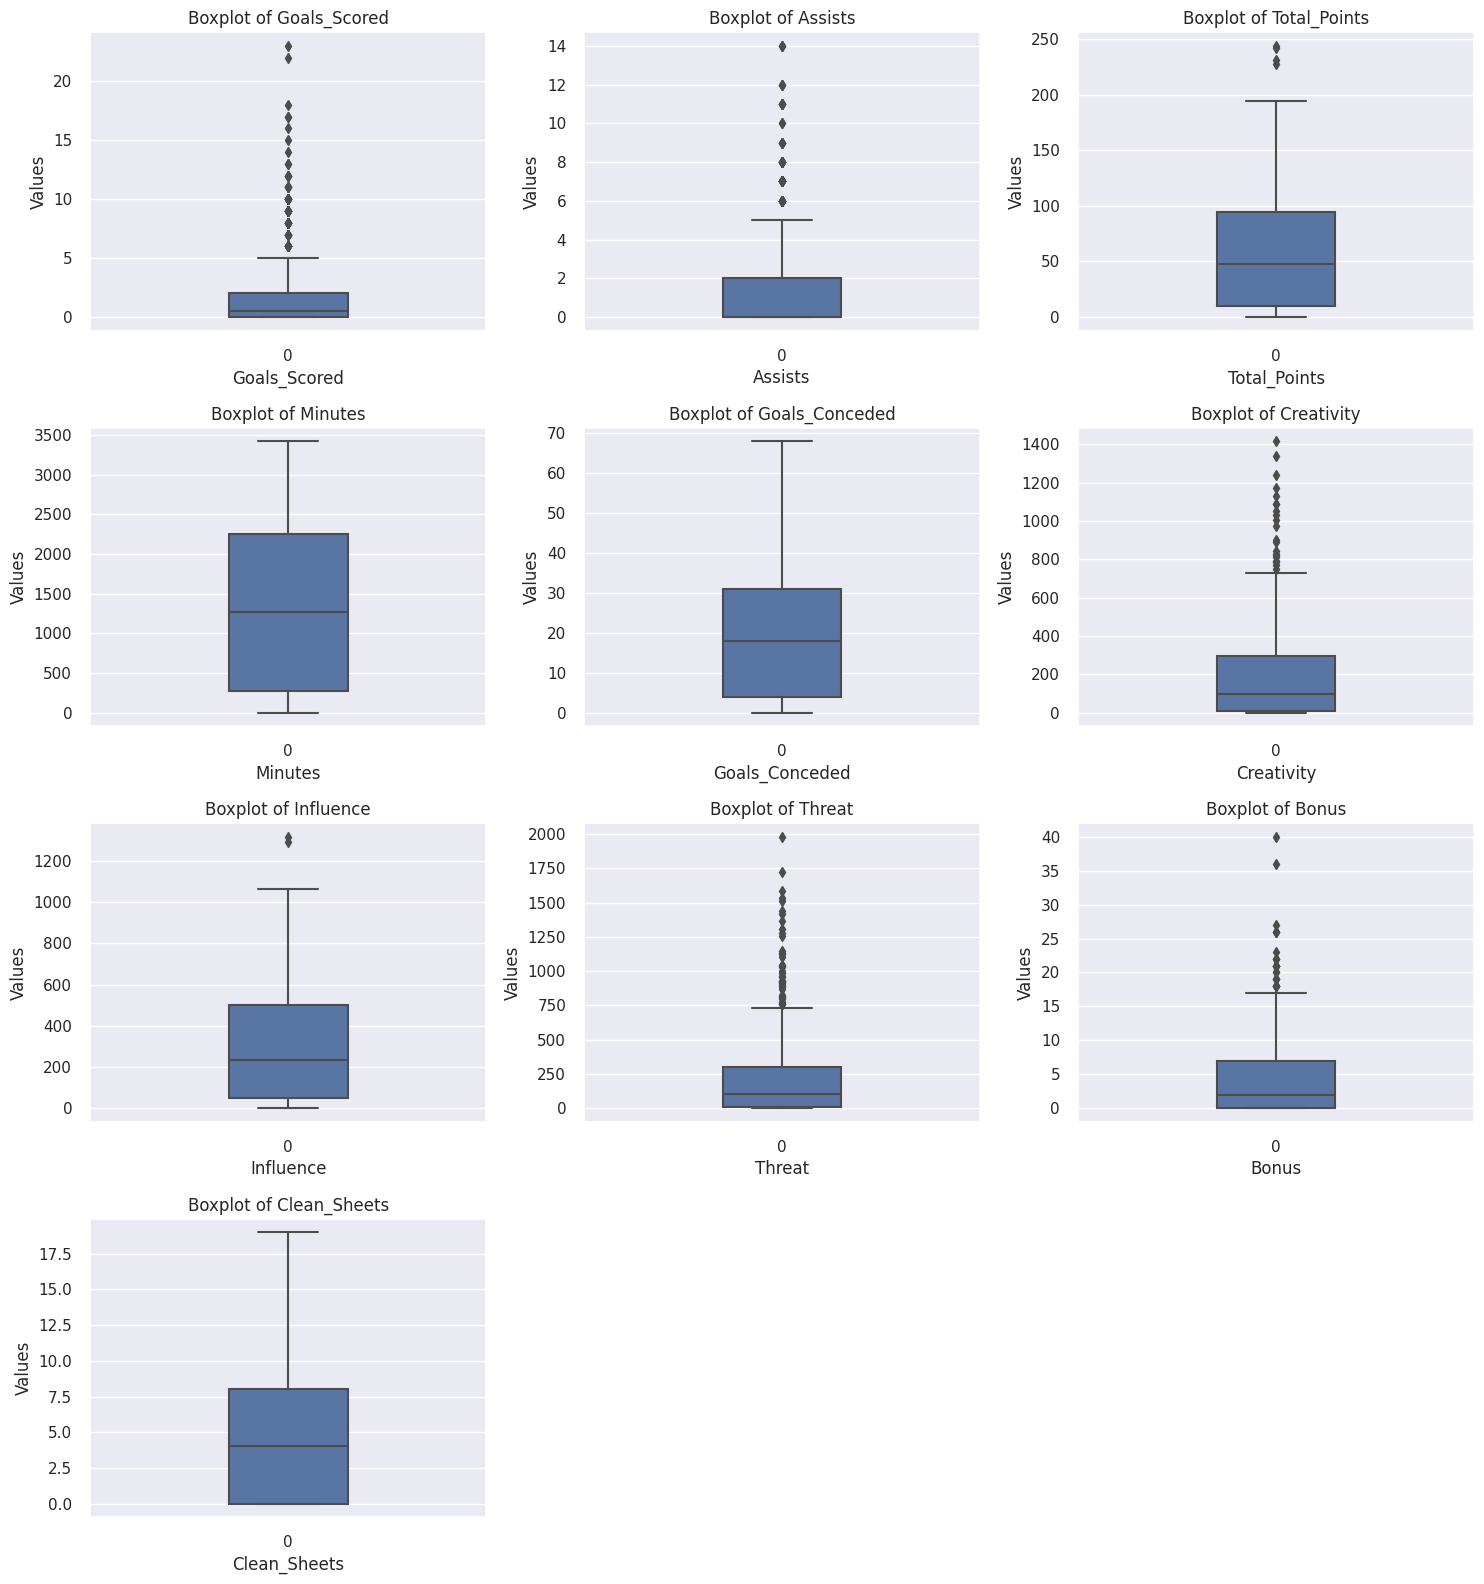

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Assuming you have already loaded your DataFrame 'df'

# Select numerical columns for plotting
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows and columns needed for the grid
num_plots = len(numerical_columns)
num_rows = math.ceil(num_plots / 3)  # Change 3 to any desired number of columns

# Plot small boxplots for each numerical column
plt.figure(figsize=(15, 4 * num_rows))
for i, col in enumerate(numerical_columns):
    plt.subplot(num_rows, 3, i+1)  # num_rows rows, 3 columns, index i+1 for each subplot
    sns.boxplot(data=df[col], width=0.3)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.ylabel("Values")

plt.tight_layout()
plt.show()


## Data Preprocessing

In [67]:
# copying the data to another variable to avoid any changes to original data
df1 = df.copy()

In [68]:
df1.head()

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0
1,Alexandre Lacazette,Arsenal,Forward,13,3,129,1916,21,307.4,602.4,797,21,7
2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11
3,Bukayo Saka,Arsenal,Midfielder,5,5,114,2554,31,650.6,493.0,984,8,8
4,Calum Chambers,Arsenal,Defender,0,3,36,751,10,169.4,171.8,77,3,2


In [69]:
df.head()

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0
1,Alexandre Lacazette,Arsenal,Forward,13,3,129,1916,21,307.4,602.4,797,21,7
2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11
3,Bukayo Saka,Arsenal,Midfielder,5,5,114,2554,31,650.6,493.0,984,8,8
4,Calum Chambers,Arsenal,Defender,0,3,36,751,10,169.4,171.8,77,3,2


### Scaling

In [70]:
from sklearn.preprocessing import StandardScaler

# Select the numerical variables to scale
numerical_vars = ['Goals_Scored', 'Assists', 'Total_Points','Minutes','Goals_Conceded','Creativity','Influence','Threat','Bonus','Clean_Sheets']

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the numerical variables
df1[numerical_vars] = scaler.fit_transform(df1[numerical_vars])


In [71]:
df1.head()

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,-0.552608,-0.647555,-1.122506,-1.232383,-1.202653,-0.780115,-1.039325,-0.707638,-0.755435,-1.081123
1,Alexandre Lacazette,Arsenal,Forward,3.213401,0.461208,1.375560,0.539871,0.115663,0.443542,1.150596,1.799393,2.606688,0.513521
2,Bernd Leno,Arsenal,Goalkeeper,-0.552608,-0.647555,1.414592,1.672585,1.120094,-0.780115,1.523682,-0.701346,1.005677,1.424747
3,Bukayo Saka,Arsenal,Midfielder,0.895857,1.200384,1.082818,1.134662,0.743432,1.809706,0.741621,2.387618,0.525374,0.741328
4,Calum Chambers,Arsenal,Defender,-0.552608,0.461208,-0.439441,-0.546229,-0.574884,-0.105790,-0.459134,-0.465428,-0.275132,-0.625510


### Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

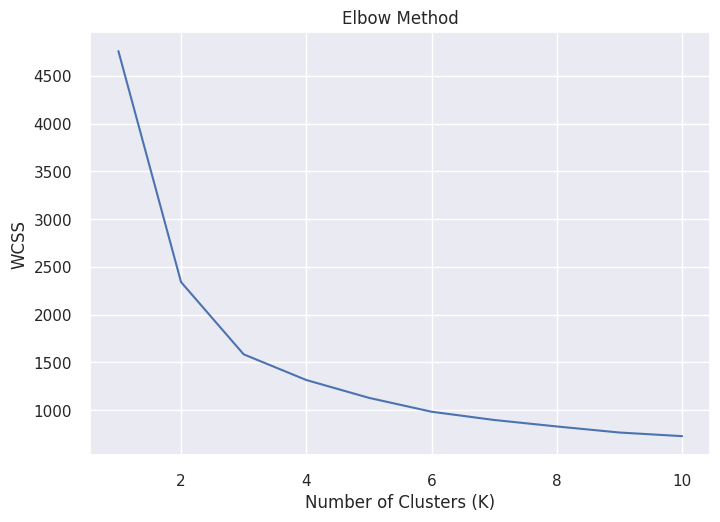

In [72]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select the numerical features for clustering
numerical_features = ['Goals_Scored', 'Assists', 'Total_Points','Minutes','Goals_Conceded','Creativity','Influence','Threat','Bonus','Clean_Sheets']


# Create an empty list to store the within-cluster sum of squares (WCSS)
wcss = []

# Perform K-means clustering for different values of K
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df1[numerical_features])
    wcss.append(kmeans.inertia_)  # Get the WCSS

# Plot the WCSS against the number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()


- 2 or 3 seems optimal

### Sihouette_Score

In [73]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Select numerical features for clustering
numerical_features = ['Goals_Scored', 'Assists', 'Total_Points','Minutes','Goals_Conceded','Creativity','Influence','Threat','Bonus','Clean_Sheets']

X = df1[numerical_features]

# Define range of K values
k_values = range(2, 11)

# Perform clustering and calculate silhouette coefficient for each K value
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Find the index of the maximum silhouette score
best_k_index = np.argmax(silhouette_scores)
best_k = k_values[best_k_index]

# Print the silhouette scores and the best K
for k, score in zip(k_values, silhouette_scores):
    print(f"Silhouette score for K={k}: {score:.3f}")

print(f"Best K: {best_k}")




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette score for K=2: 0.485
Silhouette score for K=3: 0.466
Silhouette score for K=4: 0.404
Silhouette score for K=5: 0.407
Silhouette score for K=6: 0.415
Silhouette score for K=7: 0.381
Silhouette score for K=8: 0.385
Silhouette score for K=9: 0.379
Silhouette score for K=10: 0.369
Best K: 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


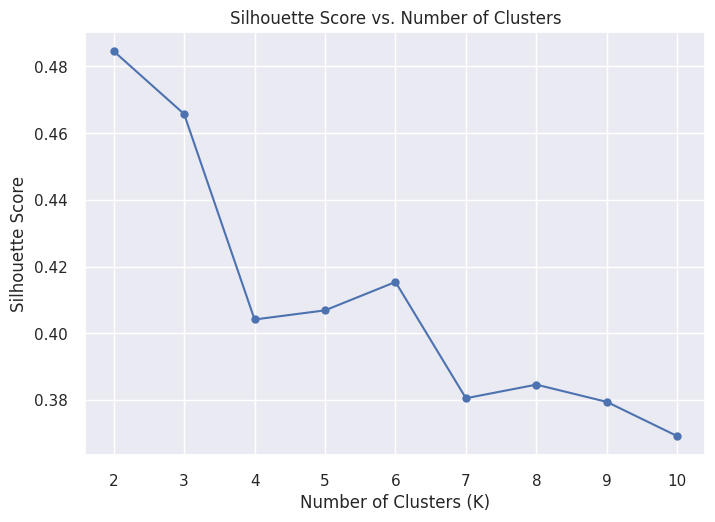

In [74]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xticks(k_values)
plt.grid(True)
plt.show()



## Summary Clusters

In [75]:
from sklearn.cluster import KMeans

# Select numerical features for clustering
numerical_features = ['Goals_Scored', 'Assists', 'Total_Points','Minutes','Goals_Conceded','Creativity','Influence','Threat','Bonus','Clean_Sheets']
X = df[numerical_features]

# Perform K-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(X)

# Assign cluster labels to the DataFrame
df['Cluster'] = labels

# Get mean and count of variables under different clusters
cluster_profile = df.groupby('Cluster').agg(['mean', 'count'])

# Print the cluster profiles
cluster_profile


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-75-8b57ea522d32>:15: FutureWarning: ['Player_Name', 'Club', 'Position'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  cluster_profile = df.groupby('Cluster').agg(['mean', 'count'])


Goals_Scored         Assists       Total_Points            Minutes  \
                mean count      mean count         mean count         mean   
Cluster                                                                      
0           0.639706   272  0.621324   272    22.827206   272   527.768382   
1           3.598039   204  3.259804   204   106.102941   204  2415.764706   

              Goals_Conceded        Creativity         Influence        \
        count           mean count        mean count        mean count   
Cluster                                                                  
0         272       7.941176   272   71.338235   272  101.566176   272   
1         204      34.112745   204  362.159804   204  552.019608   204   

             Threat           Bonus       Clean_Sheets        
               mean count      mean count         mean count  
Cluster                                                       
0         87.154412   272  1.363971   272     1.654412   272  
1        408.705882   204  9.191176   204     8.867647   204

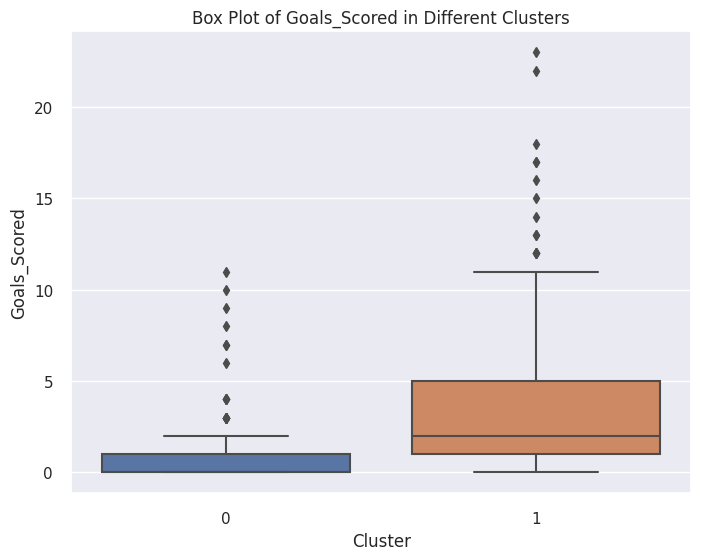

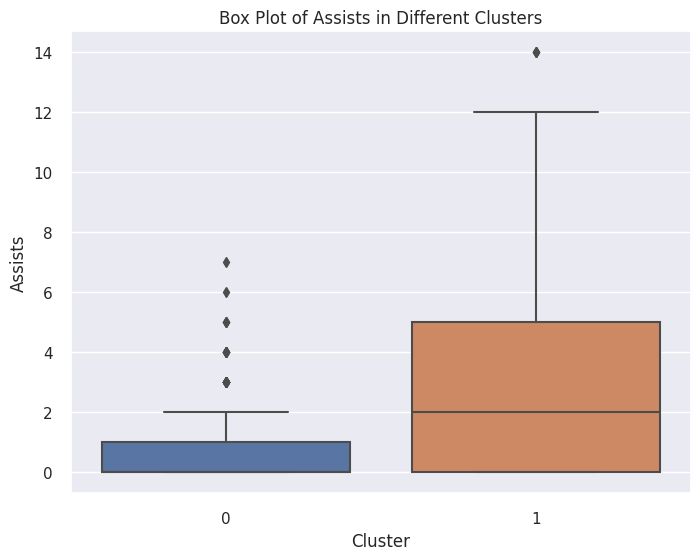

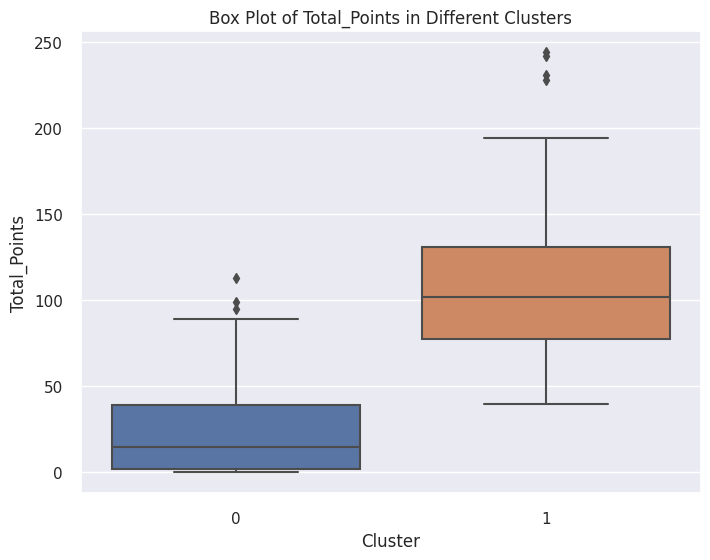

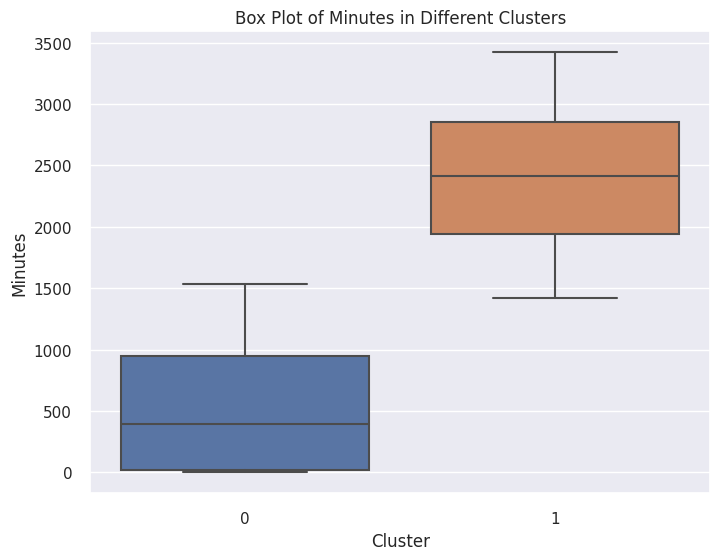

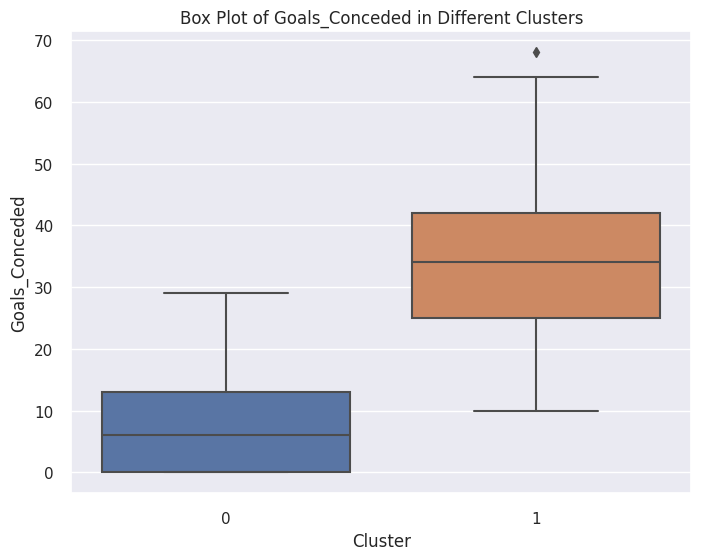

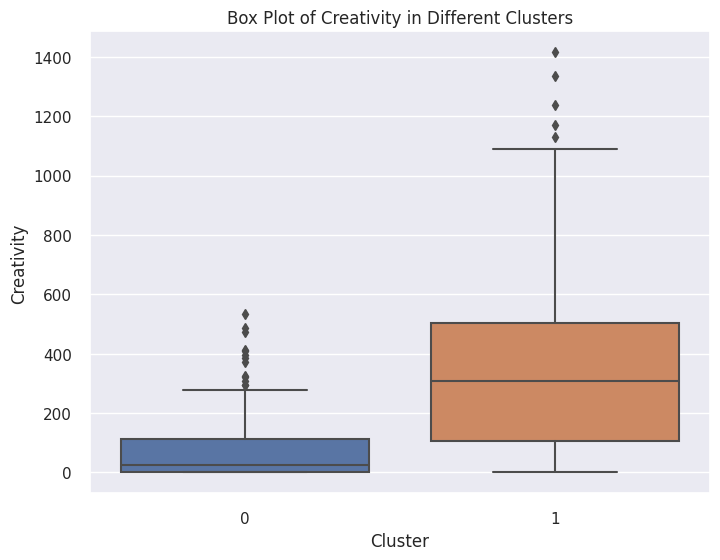

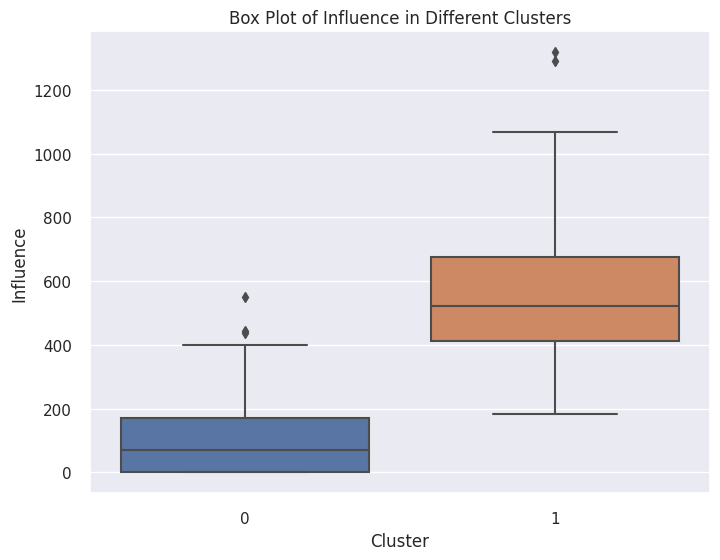

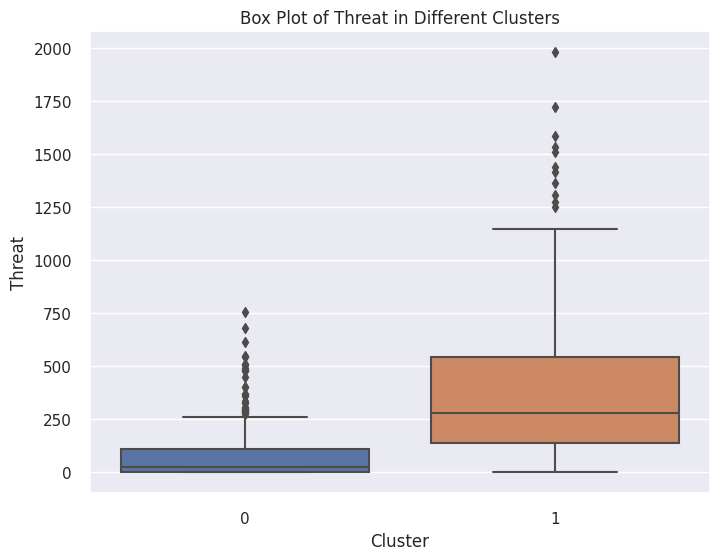

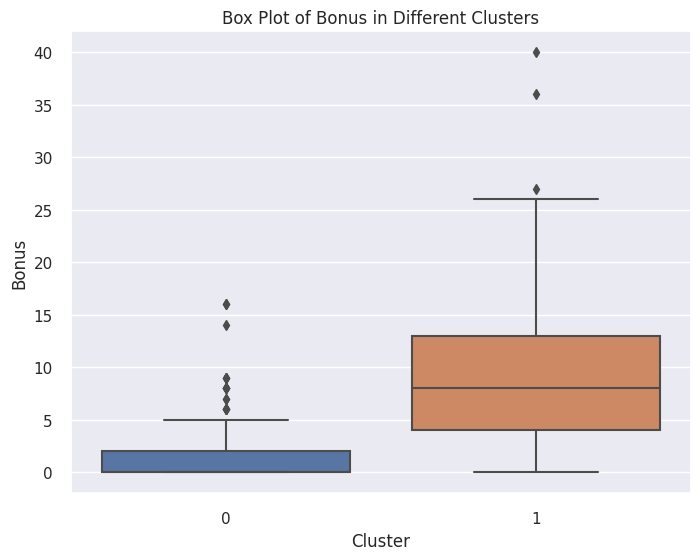

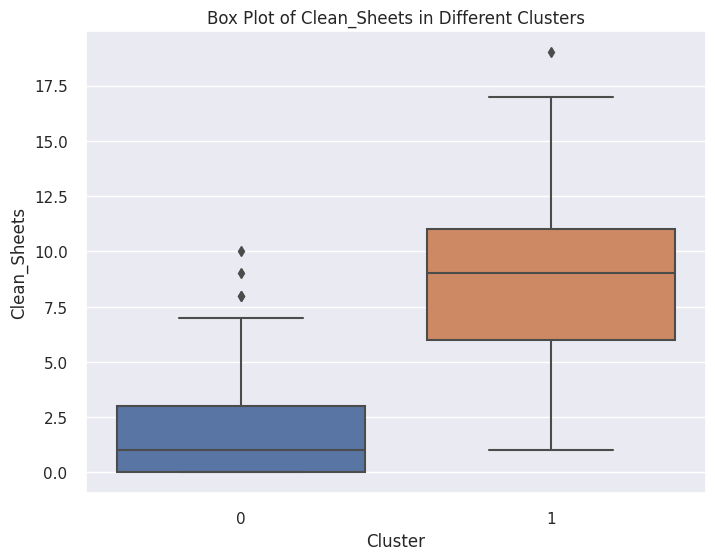

In [76]:
# Plot box plots for each numerical feature in different clusters
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='Cluster', y=feature)
    plt.title(f"Box Plot of {feature} in Different Clusters")
    plt.xlabel("Cluster")
    plt.ylabel(feature)
    plt.show()


In [77]:
from sklearn.cluster import KMeans

# Select numerical features for clustering
numerical_features = ['Goals_Scored', 'Assists', 'Total_Points','Minutes','Goals_Conceded','Creativity','Influence','Threat','Bonus','Clean_Sheets']
X = df[numerical_features]

# Perform K-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(X)

# Assign cluster labels to the DataFrame
df['Cluster'] = labels

# Create separate DataFrames for cluster 0 and cluster 1
cluster_0_data = df[df['Cluster'] == 0]
cluster_1_data = df[df['Cluster'] == 1]


# Concatenate the DataFrames
cluster_data = pd.concat([cluster_0_data, cluster_1_data])

cluster_data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,Cluster
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0,0
4,Calum Chambers,Arsenal,Defender,0,3,36,751,10,169.4,171.8,77,3,2,0
5,Cedric Soares,Arsenal,Defender,0,1,28,744,11,114.8,110.8,66,3,2,0
7,David Luiz,Arsenal,Defender,1,0,41,1396,20,46.7,250.6,144,0,3,0
8,Edward Nketiah,Arsenal,Forward,2,1,36,411,6,97.3,116.6,211,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Pedro Lomba Neto,Wolverhampton Wanderers,Midfielder,5,8,124,2549,38,1007.3,594.2,722,10,9,1
469,Romain Saiss,Wolverhampton Wanderers,Defender,3,0,99,2407,40,101.2,584.6,347,11,8,1
470,Ruben Neves,Wolverhampton Wanderers,Midfielder,5,1,104,2670,42,455.0,697.2,445,10,8,1
472,Rui Pedro Patricio,Wolverhampton Wanderers,Goalkeeper,0,0,132,3330,51,0.0,763.6,0,12,10,1


### Statistical Cluster Summary

In [78]:
cluster_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Goals_Scored,476.0,1.907563,3.455562,0.0,0.00,0.50,2.00,23.0
Assists,476.0,1.752101,2.708563,0.0,0.00,0.00,2.00,14.0
Total_Points,476.0,58.516807,51.293559,0.0,10.00,48.00,94.25,244.0
Minutes,476.0,1336.909664,1073.773995,0.0,268.75,1269.50,2256.25,3420.0
Goals_Conceded,476.0,19.157563,15.946171,0.0,4.00,18.00,31.00,68.0
Creativity,476.0,195.976050,251.478541,0.0,8.30,96.95,296.95,1414.9
Influence,476.0,294.617647,267.779681,0.0,46.50,233.10,499.50,1318.2
Threat,476.0,224.962185,318.240377,0.0,5.75,104.50,298.25,1980.0
Bonus,476.0,4.718487,6.252625,0.0,0.00,2.00,7.00,40.0
Clean_Sheets,476.0,4.745798,4.394312,0.0,0.00,4.00,8.00,19.0


In [79]:
# Print categorical summary
print('Categorical Summary:')
cluster_data.describe(include=['object']).T

Categorical Summary:


,count,unique,top,freq
Player_Name,476,476,Alex Runnarsson,1
Club,476,17,Arsenal,30
Position,476,4,Midfielder,195


<ipython-input-80-71f9bc54786f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset_corr = cluster_data.corr().round(4)


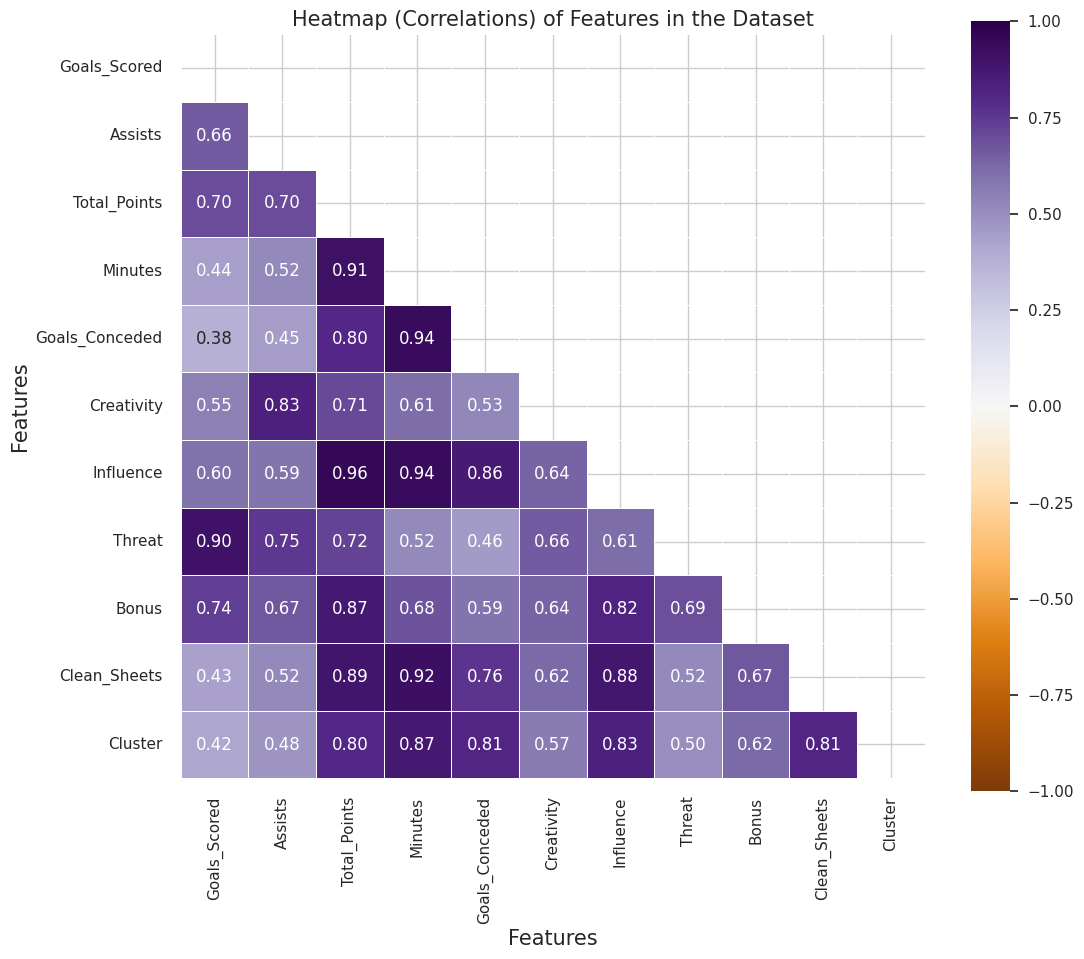

In [80]:
# Create a correlation for the dataset.
dataset_corr = cluster_data.corr().round(4)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Create a correlation matrix. Only bottom left corner valued.
mask = np.zeros_like(dataset_corr.round(4))
mask[np.triu_indices_from(mask)] = True

# Generate the corrleation matrix (heatmap) using Seaborn.
with sns.axes_style("whitegrid"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(dataset_corr.round(2), mask=mask, vmax=1, center = 0, vmin=-1, square=True, cmap='PuOr', linewidths=.5, annot=True, annot_kws={"size": 12}, fmt='.2f')
    plt.title('Heatmap (Correlations) of Features in the Dataset', fontsize=15)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Features', fontsize=15)
plt.show()


In [81]:
# Create a cross-tabulation of clusters against Brand
cross_tab = pd.crosstab(cluster_data['Cluster'], cluster_data['Position']).T

# Print the cross-tabulation
cross_tab


Cluster,0,1
Position,,
Defender,98,74
Forward,42,22
Goalkeeper,28,17
Midfielder,104,91


In [82]:
# Create a cross-tabulation of clusters against Brand
cross_tab = pd.crosstab(cluster_data['Cluster'], cluster_data['Club']).T

# Print the cross-tabulation
cross_tab


Cluster,0,1
Club,,
Arsenal,18,12
Aston Villa,14,12
Brighton and Hove Albion,15,13
Burnley,18,9
Chelsea,14,14
Crystal Palace,17,13
Everton,12,15
Leeds United,18,11
Leicester City,16,13


In [83]:
# Create a cross-tabulation of clusters against Brand
cross_tab = pd.crosstab(cluster_data['Cluster'], cluster_data['Player_Name']).T

# Print the cross-tabulation
cross_tab


Cluster,0,1
Player_Name,,
Aaron Connolly,1,0
Aaron Cresswell,0,1
Aaron Wan-Bissaka,0,1
Abdoulaye Doucoure,0,1
Adam Forshaw,1,0
...,...,...
Yerry Mina,0,1
Yoshinori Muto,1,0
Youri Tielemans,0,1


## Hierachial Clusters

In [84]:
df.head()

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,Cluster
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0,0
1,Alexandre Lacazette,Arsenal,Forward,13,3,129,1916,21,307.4,602.4,797,21,7,1
2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11,1
3,Bukayo Saka,Arsenal,Midfielder,5,5,114,2554,31,650.6,493.0,984,8,8,1
4,Calum Chambers,Arsenal,Defender,0,3,36,751,10,169.4,171.8,77,3,2,0


In [85]:
df1.head()

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,-0.552608,-0.647555,-1.122506,-1.232383,-1.202653,-0.780115,-1.039325,-0.707638,-0.755435,-1.081123
1,Alexandre Lacazette,Arsenal,Forward,3.213401,0.461208,1.375560,0.539871,0.115663,0.443542,1.150596,1.799393,2.606688,0.513521
2,Bernd Leno,Arsenal,Goalkeeper,-0.552608,-0.647555,1.414592,1.672585,1.120094,-0.780115,1.523682,-0.701346,1.005677,1.424747
3,Bukayo Saka,Arsenal,Midfielder,0.895857,1.200384,1.082818,1.134662,0.743432,1.809706,0.741621,2.387618,0.525374,0.741328
4,Calum Chambers,Arsenal,Defender,-0.552608,0.461208,-0.439441,-0.546229,-0.574884,-0.105790,-0.459134,-0.465428,-0.275132,-0.625510


In [86]:
df1[numerical_features]

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,-0.552608,-0.647555,-1.122506,-1.232383,-1.202653,-0.780115,-1.039325,-0.707638,-0.755435,-1.081123
1,3.213401,0.461208,1.375560,0.539871,0.115663,0.443542,1.150596,1.799393,2.606688,0.513521
2,-0.552608,-0.647555,1.414592,1.672585,1.120094,-0.780115,1.523682,-0.701346,1.005677,1.424747
3,0.895857,1.200384,1.082818,1.134662,0.743432,1.809706,0.741621,2.387618,0.525374,0.741328
4,-0.552608,0.461208,-0.439441,-0.546229,-0.574884,-0.105790,-0.459134,-0.465428,-0.275132,-0.625510
...,...,...,...,...,...,...,...,...,...,...
471,-0.552608,-0.647555,-1.122506,-1.086016,-0.763215,-0.679404,-0.984745,-0.707638,-0.755435,-1.081123
472,-0.552608,-0.647555,1.434108,1.858107,1.998971,-0.780115,1.753217,-0.707638,1.165778,1.196940
473,-0.552608,-0.277967,-0.634602,-0.771839,-0.700438,-0.067576,-0.802314,-0.481156,-0.755435,-1.081123
474,-0.262915,-0.277967,-0.361377,-0.215271,-0.386553,-0.119723,-0.766426,0.097632,-0.275132,0.057909


In [89]:
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, cophenet

# Assuming df1_scaled is your scaled data DataFrame
df1_scaled = df1[numerical_features]

# List of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# List of linkage methods
linkage_methods = ["single", "complete", "average", "weighted","centroid","ward"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(pdist(df1_scaled, metric=dm), method=lm)
        c, coph_dists = cophenet(Z, pdist(df1_scaled, metric=dm))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

print(
    "Best Cophenetic Correlation: {} for {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)


Cophenetic correlation for Euclidean distance and single linkage is 0.8430175514228705.
Cophenetic correlation for Euclidean distance and complete linkage is 0.741204129226176.
Cophenetic correlation for Euclidean distance and average linkage is 0.8476499945585418.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.862458135106748.
Cophenetic correlation for Euclidean distance and centroid linkage is 0.8068296032280463.
Cophenetic correlation for Euclidean distance and ward linkage is 0.5777738445861551.
Cophenetic correlation for Chebyshev distance and single linkage is 0.8616510864911588.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8505809808511917.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8906542356343754.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8626912835554484.
Cophenetic correlation for Chebyshev distance and centroid linkage is 0.8677034759210013.
Cophenetic correlation

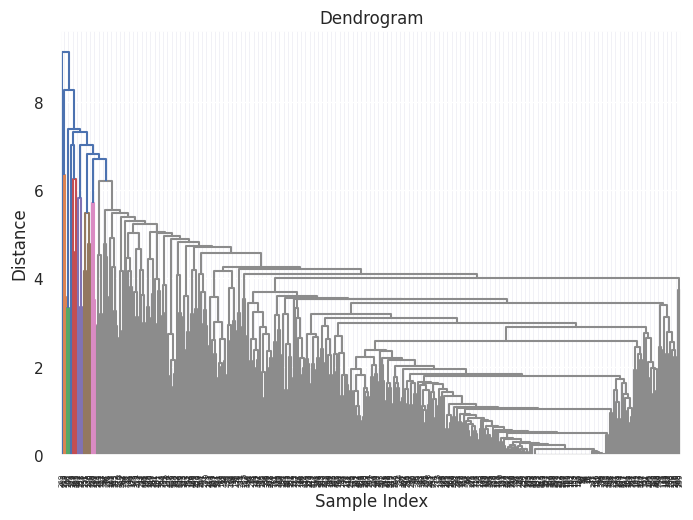

In [90]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram
import pandas as pd

# Define the distance metric and linkage method based on the highest cophenetic correlation coefficient
distance_metric = 'mahalanobis'  # Replace with the best distance metric
linkage_method = 'average'  # Replace with the best linkage method

# Perform hierarchical clustering
Z = linkage(df1_scaled, method=linkage_method, metric=distance_metric)

# Plot the dendrogram
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

# Rotate X-axis labels for better readability
plt.xticks(rotation=90)

plt.show()


_ 3 or 4 clusters seems to be ok

### Cluster Profiling

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.preprocessing import StandardScaler

# Load your data and preprocess it if needed
# ...

# Select numerical features for clustering
numerical_features = ['Goals_Scored', 'Assists', 'Total_Points', 'Minutes', 'Goals_Conceded', 'Creativity', 'Influence', 'Threat', 'Bonus', 'Clean_Sheets']
df1_scaled = df1[numerical_features]

# Perform hierarchical clustering
linkage_matrix = linkage(df1_scaled, method='average')

# Determine the number of clusters
num_clusters = 4
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Assign cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Get mean and count of variables under different clusters
cluster_profile = df.groupby('Cluster').agg(['mean', 'count'])

# Print the cluster profiles
cluster_profile


<ipython-input-92-58aac6b5c76c>:24: FutureWarning: ['Player_Name', 'Club', 'Position'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  cluster_profile = df.groupby('Cluster').agg(['mean', 'count'])


Goals_Scored          Assists       Total_Points            Minutes  \
                mean count       mean count         mean count         mean   
Cluster                                                                       
1          19.333333     3  13.000000     3   238.000000     3  3101.000000   
2          16.800000     5   9.200000     5   189.000000     5  3033.200000   
3           8.565217    46   5.826087    46   129.391304    46  2238.934783   
4           0.881517   422   1.139810   422    47.969194   422  1205.945498   

              Goals_Conceded         Creativity          Influence        \
        count           mean count         mean count         mean count   
Cluster                                                                    
1           3      37.000000     3  1041.300000     3  1221.000000     3   
2           5      44.000000     5   494.340000     5   860.720000     5   
3          46      29.760870    46   543.273913    46   586.234783    46   
4         422      17.580569   422   148.574408   422   249.536967   422   

              Threat            Bonus       Clean_Sheets        
                mean count       mean count         mean count  
Cluster                                                         
1        1294.666667     3  34.000000     3    12.666667     3  
2        1591.600000     5  21.800000     5    10.800000     5  
3         861.739130    46  14.021739    46     8.739130    46  
4         131.753555   422   3.293839   422     4.182464   422

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.preprocessing import StandardScaler

# Load your data and preprocess it if needed
# ...

# Select numerical features for clustering
numerical_features = ['Goals_Scored', 'Assists', 'Total_Points', 'Minutes', 'Goals_Conceded', 'Creativity', 'Influence', 'Threat', 'Bonus', 'Clean_Sheets']
df1_scaled = df1[numerical_features]

# Perform hierarchical clustering
linkage_matrix = linkage(df1_scaled, method='average')

# Determine the number of clusters
num_clusters = 2
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Assign cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Get mean and count of variables under different clusters
cluster_profile = df.groupby('Cluster').agg(['mean', 'count'])

# Print the cluster profiles
cluster_profile


<ipython-input-93-03b8bef0d7fd>:24: FutureWarning: ['Player_Name', 'Club', 'Position'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  cluster_profile = df.groupby('Cluster').agg(['mean', 'count'])


Goals_Scored          Assists       Total_Points            Minutes  \
                mean count       mean count         mean count         mean   
Cluster                                                                       
1          17.750000     8  10.625000     8   207.375000     8  3058.625000   
2           1.636752   468   1.600427   468    55.972222   468  1307.478632   

              Goals_Conceded        Creativity         Influence        \
        count           mean count        mean count        mean count   
Cluster                                                                  
1           8      41.375000     8  699.450000     8  995.825000     8   
2         468      18.777778   468  187.369658   468  282.631197   468   

              Threat            Bonus       Clean_Sheets        
                mean count       mean count         mean count  
Cluster                                                         
1        1480.250000     8  26.375000     8    11.500000     8  
2         203.504274   468   4.348291   468     4.630342   468